In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy import integrate as integrate


In [42]:
plt.style.use('default')
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [43]:
def E(z, omega, omega_R, omega_lambda):
    return ((omega*((1+z)**3)) +
            (omega_R*((1+z)**2))+ omega_lambda)**(1/2)

# Lookback Time (Fig 13.1 Peebles)

In [44]:
def f(z,omega,omega_R,omega_lambda):
    return 1/((1+z)*E(z, omega, omega_R, omega_lambda))

In [45]:
def integral(f,z,omega,omega_R, omega_lambda):
    
    I = integrate.quad(f, 0, z, args=(omega,omega_R, omega_lambda,))[0]
    return I

In [46]:
def integral0(f,omega,omega_R, omega_lambda):
    
    I = integrate.quad(f, 0, np.inf, args=(omega,omega_R, omega_lambda,))[0]
    return I

In [47]:
print(integral0(f,0.05,0,0.95))

1.489906755144919


In [48]:
z0 = 0
zf = 10
zs = np.linspace(z0, zf, 1000)
Ez = np.linspace(z0, zf, 1000)
Ho_tz = np.linspace(z0, zf, 1000)
Ho_to =  np.linspace(z0, zf, 1000)
Ho_ao_rz= np.linspace(z0, zf, 1000)
fz = np.linspace(z0, zf, 1000)
gz =  np.linspace(z0, zf, 1000)


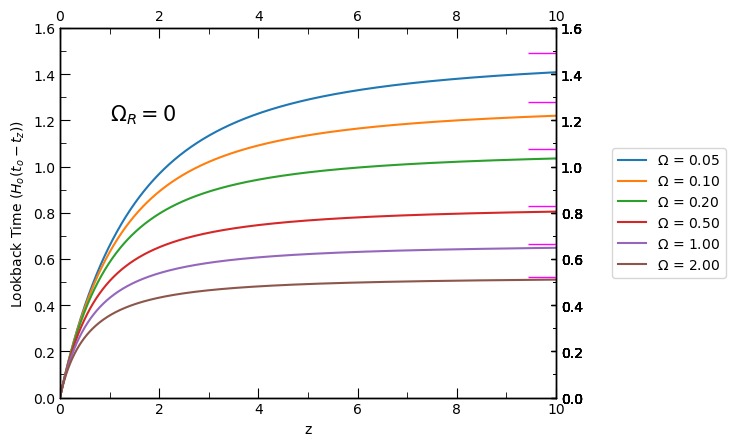

In [62]:
omega= 0.7
omega_R = 0
omega_lambda = 0.3
fig, ax1 = plt.subplots()
for omega in np.array([0.05,0.1,0.2,0.5,1,2]):
    for index in range(zs.size):
            #fz[index] = f(zs[index])
            Ho_tz[index] = integral (f,zs[index], omega,0,1-omega)
    outliers = np.argwhere ( Ho_tz < -1e+5 )
    zs_new=np.delete(zs,outliers)
    Ho_tz_new= np.delete(Ho_tz,outliers)
   
    if (omega > 0):
        ax1.plot(zs_new,Ho_tz_new, label='$\Omega$ = {:.2f}'.format(omega))
    Ho_to = integral0 (f, omega,0,1-omega)
    ax2 = ax1.twinx()
#print(Ho_to)
    ax2.plot(10, Ho_to,  marker=0, markersize=20, markeredgecolor="magenta")
    ax2.set_ylim(0,1.6)
    ax2.tick_params(direction='in')
    ax2.yaxis.set_major_locator(MultipleLocator(0.2))
    ax2.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax2.tick_params(which ='both',direction='in')
ax3= ax1.twiny()
ax3.set_xlim(0,10)
ax3.tick_params(direction='in')
ax3.xaxis.set_major_locator(MultipleLocator(2))
ax3.xaxis.set_minor_locator(MultipleLocator(1))
ax3.tick_params(which ='both',direction='in')
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)
        
        
ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax1.set_xlabel("z")
ax1.set_xlim(0,10)
ax1.set_ylim(0,1.6)
ax1.set_ylabel("Lookback Time ($H_o(t_o-t_z$))")
ax1.text(1,1.2, '$\Omega_R=0$', fontsize=15)
ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(which ='both',direction='in')
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)


plt.show()
            #Ez[index] = E(zs[index],0.7,0,0.3)
    #fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(16,9))



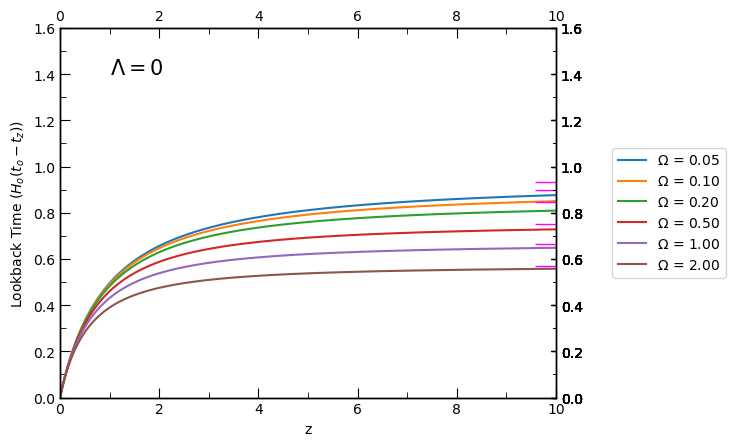

In [63]:
omega= 0.7
omega_R = 0
omega_lambda = 0.3
fig, ax1 = plt.subplots()
for omega in np.array([0.05,0.1,0.2,0.5,1,2]):
    for index in range(zs.size):
            #fz[index] = f(zs[index])
            Ho_tz[index] = integral (f,zs[index], omega,1-omega,0)
    outliers = np.argwhere ( Ho_tz < -1e+5 )
    zs_new=np.delete(zs,outliers)
    Ho_tz_new= np.delete(Ho_tz,outliers)
    if (omega > 0):
        ax1.plot(zs_new,Ho_tz_new, label='$\Omega$ = {:.2f}'.format(omega))
    ax2 = ax1.twinx()
    Ho_to = integral0 (f,omega,1-omega,0)
    #print(Ho_to)
    ax2.plot(10, Ho_to, marker=0, markersize=15,markeredgecolor="magenta")
    ax2.set_ylim(0,1.6)
    ax2.tick_params(direction='in')
    ax2.yaxis.set_major_locator(MultipleLocator(0.2))
    ax2.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax2.tick_params(which ='both',direction='in')
    
ax3= ax1.twiny()
ax3.set_xlim(0,10)
ax3.tick_params(direction='in')
ax3.xaxis.set_major_locator(MultipleLocator(2))
ax3.xaxis.set_minor_locator(MultipleLocator(1))
ax3.tick_params(which ='both',direction='in')
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)
        
ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax1.set_xlabel("z")
ax1.set_ylabel("Lookback Time ($H_o(t_o-t_z$))")
ax1.set_xlim(0,10)
ax1.set_ylim(0,1.6)
ax1.text(1,1.4, '$\Lambda=0$', fontsize=15)
ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(which ='both',direction='in')
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)


plt.show()
            #Ez[index] = E(zs[index],0.7,0,0.3)
    #fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(16,9))


In [126]:
outliers = np.argwhere ( Ho_tz < -1e+5 )

In [127]:
print( Ho_tz)
print(zs)
print(outliers)

[1.00000000e-03 3.00100100e-03 5.00200200e-03 7.00300300e-03
 9.00400400e-03 1.10050050e-02 1.30060060e-02 1.50070070e-02
 1.70080080e-02 1.90090090e-02 2.10100100e-02 2.30110110e-02
 2.50120120e-02 2.70130130e-02 2.90140140e-02 3.10150150e-02
 3.30160160e-02 3.50170170e-02 3.70180180e-02 3.90190190e-02
 4.10200200e-02 4.30210210e-02 4.50220220e-02 4.70230230e-02
 4.90240240e-02 5.10250250e-02 5.30260260e-02 5.50270270e-02
 5.70280280e-02 5.90290290e-02 6.10300300e-02 6.30310310e-02
 6.50320320e-02 6.70330330e-02 6.90340340e-02 7.10350350e-02
 7.30360360e-02 7.50370370e-02 7.70380380e-02 7.90390390e-02
 8.10400400e-02 8.30410410e-02 8.50420420e-02 8.70430430e-02
 8.90440440e-02 9.10450450e-02 9.30460460e-02 9.50470470e-02
 9.70480480e-02 9.90490490e-02 1.01050050e-01 1.03051051e-01
 1.05052052e-01 1.07053053e-01 1.09054054e-01 1.11055055e-01
 1.13056056e-01 1.15057057e-01 1.17058058e-01 1.19059059e-01
 1.21060060e-01 1.23061061e-01 1.25062062e-01 1.27063063e-01
 1.29064064e-01 1.310650

# Angular Size Distance (Fig 13.2 Peebles)

In [29]:
def g(z, omega, omega_R, omega_lambda):
    return 1/(E(z, omega, omega_R, omega_lambda))

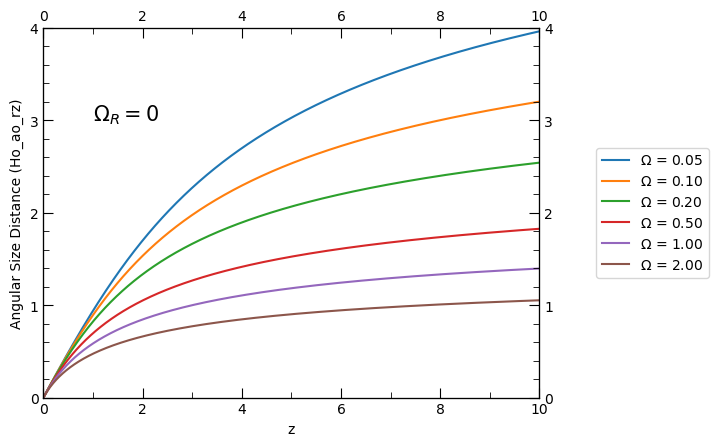

In [65]:
omega= 0.7
omega_R = 0
omega_lambda = 0.3
fig, ax1 = plt.subplots()
for omega in np.array([0.05,0.1,0.2,0.5,1,2]):
    for index in range(zs.size):
            gz[index] = g(zs[index],omega,0,1-omega)
            Ho_ao_rz[index] = integral (g,zs[index], omega,0,1-omega)
    outliers = np.argwhere ( Ho_ao_rz < -1e+5 )
    zs_new=np.delete(zs,outliers)
    Ho_ao_rz_new= np.delete(Ho_ao_rz,outliers)
   
    if (omega > 0):
        ax1.plot(zs_new,Ho_ao_rz_new, label='$\Omega$ = {:.2f}'.format(omega))
ax2 = ax1.twinx()
ax2.set_ylim(0,4)
ax2.tick_params(direction='in')
ax3= ax1.twiny()
ax3.set_xlim(0,10)
ax3.tick_params(direction='in')
ax2.yaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax3.xaxis.set_major_locator(MultipleLocator(2))
ax3.xaxis.set_minor_locator(MultipleLocator(1))
ax2.tick_params(which ='both',direction='in')
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax3.tick_params(which ='both',direction='in')
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)
    
    #a = 1/(1+zs[index])
    #print(a)
    #ax2.plot(0, a)
        
ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax1.set_xlabel("z")
ax1.set_ylabel("Angular Size Distance (Ho_ao_rz)")
ax1.text(1, 3, '$\Omega_R=0$', fontsize=15)
ax1.set_xlim(0,10)
ax1.set_ylim(0,4)
ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which ='both',direction='in')
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)

plt.show()
            #Ez[index] = E(zs[index],0.7,0,0.3)
    #fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(16,9))



In [35]:
def Mattig_y(omega,z):
    y = (2/((omega**2)*(1+z)))* (2-omega+omega*z-(2-omega)*((1+omega*z)**(1/2)))
    return y

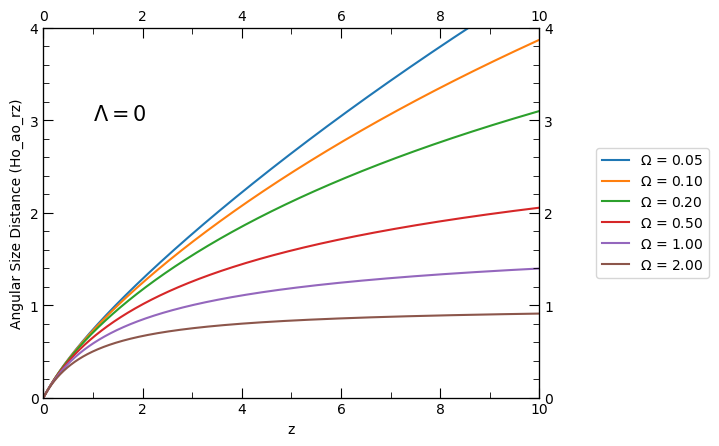

In [66]:
fig, ax1 = plt.subplots()
for omega in np.array([0.05,0.1,0.2,0.5,1,2]):
    for index in range(zs.size):
            
            Ho_ao_rz[index] = Mattig_y(omega,zs[index])
    outliers = np.argwhere ( Ho_ao_rz < -1e+5 )
    zs_new=np.delete(zs,outliers)
    Ho_ao_rz_new= np.delete(Ho_ao_rz,outliers)
   
    if (omega > 0):
        ax1.plot(zs_new,Ho_ao_rz_new, label='$\Omega$ = {:.2f}'.format(omega))
ax2 = ax1.twinx()
ax2.set_ylim(0,4)
ax2.tick_params(direction='in')
ax3= ax1.twiny()
ax3.set_xlim(0,10)
ax3.tick_params(direction='in')
ax2.yaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax3.xaxis.set_major_locator(MultipleLocator(2))
ax3.xaxis.set_minor_locator(MultipleLocator(1))
ax2.tick_params(which ='both',direction='in')
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax3.tick_params(which ='both',direction='in')
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)
    #ax2 = ax1.twinx()
    #a = 1/(1+zs[index])
    #print(a)
    #ax2.plot(0, a)
        
ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax1.set_xlabel("z")
ax1.set_ylabel("Angular Size Distance (Ho_ao_rz)")
ax1.set_xlim(0,10)
ax1.set_ylim(0,4)
ax1.text(1, 3, '$\Lambda=0$', fontsize=15)
ax1.set_xlim(0,10)
ax1.set_ylim(0,4)
ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which ='both',direction='in')
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)

plt.show()
            #Ez[index] = E(zs[index],0.7,0,0.3)
    #fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(16,9))
    

In [39]:
omega_0 = 0.001
omega_f = 2
omega_s = np.linspace(omega_0, omega_f, 1000)

Ho_tz = np.linspace(omega_0, omega_f, 1000)
Ho_ao_rz= np.linspace(omega_0, omega_f, 1000)
Ho_ao_rz2= np.linspace(omega_0, omega_f, 1000)



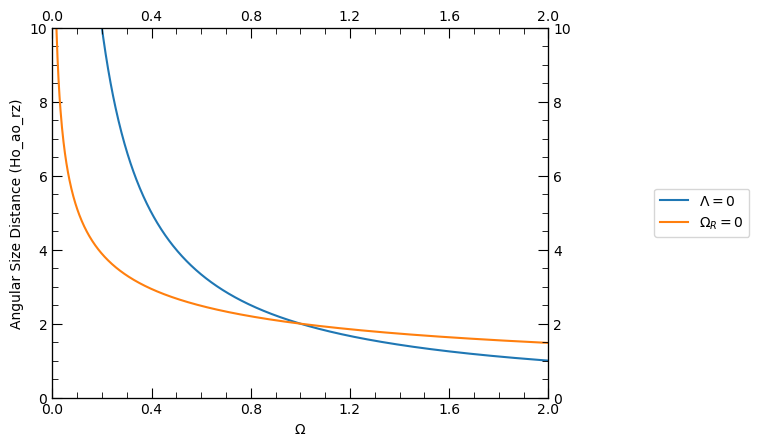

In [67]:
fig, ax1 = plt.subplots()


z = np.inf
for index in range(omega_s.size):
    Ho_ao_rz[index] = 2/omega_s[index]
    Ho_ao_rz2[index] = integral (g,np.inf, omega_s[index],0,1-omega_s[index])
    #outliers = np.argwhere ( Ho_ao_rz < -1e+5 )
    #zs_new=np.delete(zs,outliers)
    #Ho_ao_rz_new= np.delete(Ho_ao_rz,outliers)
   
    
ax1.plot(omega_s,Ho_ao_rz, label='$\Lambda=0$')
ax1.plot(omega_s,Ho_ao_rz2, label='$\Omega_R=0$')
    #ax2 = ax1.twinx()
    #a = 1/(1+zs[index])
    #print(a)
    #ax2.plot(0, a)
ax2 = ax1.twinx()
ax2.set_ylim(0,10)
ax2.tick_params(direction='in')
ax3= ax1.twiny()
ax3.set_xlim(0,2)
ax3.tick_params(direction='in')
ax3.xaxis.set_major_locator(MultipleLocator(0.4))
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_major_locator(MultipleLocator(2))
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which ='both',direction='in')
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax3.tick_params(which ='both',direction='in')
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)

ax1.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
ax1.set_xlabel("$\Omega$")
ax1.set_ylabel("Angular Size Distance (Ho_ao_rz)")
ax1.set_xlim([0,2])
ax1.set_ylim([0,10])
ax1.xaxis.set_major_locator(MultipleLocator(0.4))
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_major_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which ='both',direction='in')
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)

#ax1.text(1, 4, '$\Lambda=0$', fontsize=15)


plt.show()
            #Ez[index] = E(zs[index],0.7,0,0.3)
    #fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(16,9))